In [2]:
import numpy as np
from matplotlib import pyplot as plt
from pint import UnitRegistry; AQ = UnitRegistry().Quantity
from scipy import optimize

In [3]:
%matplotlib inline

### Connection to Turing?
According to Turing theory, 

$$
\lambda \approx (2 \pi \tau D)^{1 \over 2} \ \ \ \ (3)
$$

where $\tau$ is a "characteristic period of oscillation" (see, e.g., https://pubs.aip.org/aip/jcp/article-abstract/102/6/2551/481538/Dependence-of-Turing-pattern-wavelength-on?redirectedFrom=fulltext). Is it true here?

Well try something close to the above, but with an offset:

$$
\lambda \approx (2 \pi \tau D)^{1 \over 2} + b \ \ \ \ (4)
$$


In [4]:
# First generate some "experimental" data based on Eq. 1
Darray = AQ(np.array(      [1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3]),'micrometer^2/microsecond')
lambarray = AQ(75/np.array([17.4, 9.5,  7.2,  6.0,  5.2,  4.5]),'micrometer')

tau_bestfit 11084.40896636753 microsecond
b_bestfit -4.030699635802084 micrometer


/Users/nesh/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


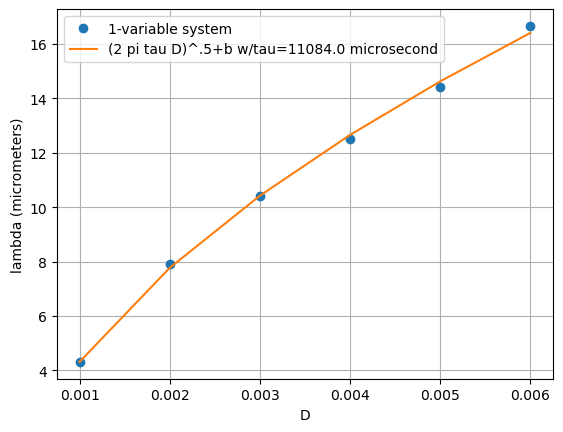

In [5]:
# Define a function corresponding to Eq. 4
def Eq4(D, tau, b):
    return (2*np.pi*tau*D)**.5+b

# Find best values for tau and b
params, params_covariance = optimize.curve_fit(Eq4, Darray.magnitude, lambarray.magnitude)  #subroutine to curve fit
tau_bestfit = AQ(params[0],'microsecond')
b_bestfit = AQ(params[1],'micrometer')
print('tau_bestfit',tau_bestfit)  
print('b_bestfit',b_bestfit)
tau = np.round(tau_bestfit)

# Generate values according to this theory
Dstart = AQ(0,'micrometer^2/microsecond')
# Darray_from_0 = np.append(Dstart,Darray)
lambarray_theory = Eq4(Darray, tau_bestfit, b_bestfit)

# Plot
plt.figure()
plt.plot(Darray,lambarray,'o',label='1-variable system')
plt.plot(Darray,lambarray_theory,label='(2 pi tau D)^.5+b w/tau='+str(tau))
plt.grid(True)
plt.xlabel('D')
plt.ylabel('lambda (micrometers)')
# plt.xlim([0,np.max(Darray.magnitude)*1.1])
# plt.ylim([0,np.max(lambarray.magnitude)*1.1])
plt.legend()

tau_bestfit 6249.545001724558 microsecond


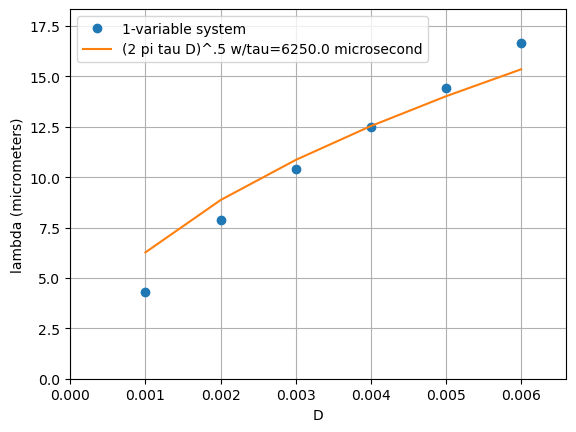

In [6]:
# Define a function corresponding to Eq. 4
def Eq5(D, tau):
    return (2*np.pi*tau*D)**.5

# Find best value for tau
params, params_covariance = optimize.curve_fit(Eq5, Darray.magnitude, lambarray.magnitude)  #subroutine to curve fit
tau_bestfit = AQ(params[0],'microsecond')
print('tau_bestfit',tau_bestfit)  
tau = np.round(tau_bestfit)

# Generate values according to this theory
# Dstart = AQ(0,'micrometer^2/microsecond')
# Darray_from_0 = np.append(Dstart,Darray)
lambarray_theory = Eq5(Darray, tau_bestfit)

# Plot
plt.figure()
plt.plot(Darray,lambarray,'o',label='1-variable system')
plt.plot(Darray,lambarray_theory,label='(2 pi tau D)^.5 w/tau='+str(tau))
plt.grid(True)
plt.xlabel('D')
plt.ylabel('lambda (micrometers)')
plt.xlim([0,np.max(Darray.magnitude)*1.1])
plt.ylim([0,np.max(lambarray.magnitude)*1.1])
plt.legend()

### So what about that $\tau$?
What happens every $10,000 \ \mu s$?

In [7]:
# # According to the paper, the time to grow a layer of ice
# growthrate = AQ(1.85,'micrometers/second') # From Table 3 in the paper
# growthrate /= layer_thicknesss
# growthrate.ito('1/microsecond')
# print('Growth rate',growthrate)
# taulayer = 1/growthrate
# print('Time to grow 1 layer =', taulayer)

# # According to the paper, the time to reach steady-state
# layers_to_steady_state = 350 # From Fig. 10 in the paper
# time_to_steady_state = layers_to_steady_state * taulayer
# print('Time to reach steady state =', time_to_steady_state)

# # According to the paper, the average time to increment the number of steps (corner - center)
# time_to_increment_1_toward_NSS = time_to_steady_state/NSS
# print('Time to increment 1 toward NSS =',time_to_increment_1_toward_NSS)

# # According to the paper, the time to increment the last number of steps (corner - center)
# time_to_increment_last_1_before_NSS = 70*taulayer # From Fig. 10 in the paper
# print('Time to increment last one toward NSS =',time_to_increment_last_1_before_NSS)

So ... the closest to $\tau$ we come to here is the time required to increment 1 toward $N_{SS}$ -- i.e., the time to add the last layer difference between the center and the corner, before reaching steady stat. Hard to see how that could be construed as a "characteristic oscillation," however.

### An alternative to Eq. 4 here

In [8]:
# # Do a curve-fit to that form
# p = np.polyfit(Darray.magnitude,lambarray.magnitude**2,1)
# m = p[0]; print('m =',m)
# b = p[1]; print('b =',b)

# lambarray_theory1 = (m*Darray.magnitude+b)**(1/2)
# lambarray_theory2 = (m*Darray.magnitude)**(1/2)

# plt.figure()
# plt.plot(Darray,lambarray,'o',label='From Eq. 1')
# plt.plot(Darray,lambarray_theory1,label='(m*D+b)^(1/2)')
# plt.plot(Darray,lambarray_theory2,label='(m*D)^(1/2)')
# plt.grid(True)
# plt.xlabel('D')
# plt.ylabel('lambda (micrometers)')
# plt.legend()
# tau = m/(2*np.pi); print('tau =', tau)